## 2.6. Probability and Statistics 概率和统计


In [16]:
%matplotlib inline
import random
from mxnet import np, npx

npx.set_np()

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引
处的值是采样结果中 $i$ 出现的次数。

In [17]:
fair_probs = [1.0 / 6] * 6  # 表示表示骰子的每一面（从 1 到 6）出现的概率都是 1/6
fair_probs, np.random.multinomial(1, fair_probs)    # 从多项式分布中生成一个样本; 参数 1 表示进行一次试验; 参数 fair_probs 是概率分布列表

([0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666],
 array([1, 0, 0, 0, 0, 0], dtype=int64))

In [18]:
# 如果用Python的for循环来完成这个任务，速度会慢得惊人。 因此我们使用深度学习框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。
counts = np.random.multinomial(10000, fair_probs).astype(np.float32)
counts / 10000

array([0.1712, 0.1666, 0.1681, 0.166 , 0.1689, 0.1592])

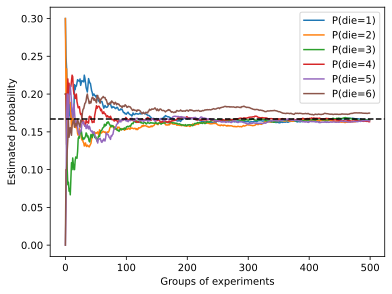

In [19]:
import tools_func as d2l 

counts = np.random.multinomial(10, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

# 从上图可以看出，随着实验次数的增加，每个骰子面的概率逼近 1/6。
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

在处理骰子掷出时，我们将集合 $S=\{1,2,3,4,5,6\}$ 称为样本空间（sample space）或结果空间（outcome space）。 其中每个元素都是结果（outcome）。 事件（event）是一组给定样本空间的随机结果。 
样本空间中的每个单独结果都是一个样本。 在这种情况下，样本空间是离散的。 如果样本空间是连续的，我们将其称为连续样本空间。 例如，我们可能对人的体重进行抽样，这是一个连续的样本空间。 在这种情况下，我们将无法列举样本空间中的每个可能结果。

概率（probability）可以被认为是将集合映射到真实值的函数。 在给定的样本空间$S$ 中，概率$P(A)$被定义为事件$A$在$S$中的概率, 满足以下属性：
- 对于任何事件$A$，其概率$P(A)$是非负的：$P(A) \geq 0$。
- 整个样本空间的概率为$1$, 即$P(S)=1$。
- 对于互斥（mutually exclusive）事件（对于所有$i \neq j$，都有$A_i \cap A_j = \emptyset$）的任意一个可数序列$A_1, A_2, \ldots$，并且$A_i \cap A_j = \emptyset$，序列中任意一个事件发生的概率等于它们各自发生的概率之和，即$P(\cup_i A_i) = \sum_i P(A_i)$。

在我们掷骰子的随机实验中，我们引入了随机变量（random variable）的概念。 随机变量几乎可以是任何数量，并且它可以在随机实验的一组可能性中取一个值。 
考虑一个随机变量$X$，其值在掷骰子的样本空间$S$中。 我们可以用$P(X=i)$表示事件$\{X=i\}$的概率，即随机变量$X$等于$i$的概率。 由于这是一个公平的骰子，我们有$P(X=i)=\frac{1}{6}$。
我们可以将事件“看到一个$5$”表示为$P(X=5)=\frac{1}{6}$。 由于我们的骰子是均匀的，我们可以将事件“看到一个偶数”表示为$P(X \in \{2,4,6\})=\frac{1}{2}$。

### 2.6.2. Multiple Random Variables 处理多个随机变量

很多时候，我们会考虑多个随机变量。 比如，我们可能需要对疾病和症状之间的关系进行建模。 给定一个疾病和一个症状，比如“流感”和“咳嗽”，以某个概率存在或不存在于某个患者身上。 我们需要估计这些概率以及概率之间的关系，以便我们可以运用我们的推断来实现更好的医疗服务。

再举一个更复杂的例子：图像包含数百万像素，因此有数百万个随机变量。 在许多情况下，图像会附带一个标签（label），标识图像中的对象。 我们也可以将标签视为一个随机变量。 我们甚至可以将所有元数据视为随机变量，例如位置、时间、光圈、焦距、ISO、对焦距离和相机类型。 所有这些都是联合发生的随机变量。 当我们处理多个随机变量时，会有若干个变量是我们感兴趣的。

**联合概率**
第一个例子被称为联合概率（joint probability）$P(A=a, B=b)$，给出了事件$A=a$和$B=b$同时发生的概率。 例如，$P(X=2, Y=3)$表示随机变量$X$等于$2$且随机变量$Y$等于$3$的概率。
请注意, 对于任何$a$和$b$的取值, $P(A=a, B=b) \leq P(A=a) \textrm{ and } P(A=a, B=b) \leq P(B = b)$。这点是确定的，因为要同时发生两个事件，其概率不会超过单独发生每个事件的概率。

**条件概率**
然而，有时我们想要知道一个事件在另一个事件已经发生的情况下发生的概率。 这被称为条件概率（conditional probability），写作$P(B=b|A=a)$，定义为$P(A=a, B=b)/P(A=a)$。 
它表示在事件$A=a$发生之后，事件$B=b$发生的概率。 例如，$P(X=2|Y=3)$表示在$Y=3$发生后$X=2$的概率。

**贝叶斯定理**
根据条件概率的定义，我们可以得到贝叶斯定理（Bayes' theorem）：$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$。 贝叶斯定理是概率统计中最有用的等式之一，它允许我们在给定$P(B|A)$和一些边缘概率的情况下计算$P(A|B)$。

**边缘化/边际化**
为了能进行事件概率求和，我们需要求和法则（sum rule）， 即$B$的概率相当于计算$A$的所有可能选择，并将所有选择的联合概率聚合在一起：$P(B) = \sum_{A} P(A, B)$。 
这被称为边缘化（marginalization），因为我们可以从$P(A, B)$的联合分布中边缘化掉$A$，以获得$P(B)$。边际化结果的概率或分布称为边际概率（marginal probability） 或边际分布（marginal distribution）。

**独立性**
另一个有用属性是依赖（dependence）与独立（independence）。 如果两个随机变量$A$和$B$是独立的，则意味着事件$A$的发生与$B$事件的发生无关。 在这种情况下，$P(B|A) = P(B)$。 此外，这也意味着$P(B, A) = P(B)P(A)$。 也就是说，知道$A$的信息并没有帮助我们预测$B$的结果。 从另一个角度来看，如果$P(B|A) = P(B)$，则$A$和$B$是独立的。在所有其他情况下，我们称$A$和$B$是相关的。比如，两次连续抛出一个骰子的事件是相互独立的。 相比之下，灯开关的位置和房间的亮度并不是（因为可能存在灯泡坏掉、电源故障，或者开关故障）。
由于$P(A|B) = P(A, B)/P(B) = P(A)$，我们可以看到，独立性等价于条件概率与边缘概率的乘积等于联合概率，即$P(A|B) = P(A)$。

**应用**

我们实战演练一下！ 假设一个医生对患者进行艾滋病病毒（HIV）测试。 这个测试是相当准确的，如果患者健康但测试显示他患病，这个概率只有1%； 如果患者真正感染HIV，它永远不会检测不出。 我们使用$D_1$来表示诊断结果（如果阳性，则为1，如果阴性，则为0）， $H$来表示感染艾滋病病毒的状态（如果阳性，则为1，如果阴性，则为0）。我们可以列出下面的表格:

| 条件概率     | $H=1$ | $H=0$ |
|----------|-------|-------|
| $P(D_1=1 | H)$   | 1     | 0.01 |
| $P(D_1=0 | H)$   | 0     | 0.99 |

请注意，每列的加和都是1（但每行的加和不是），因为条件概率需要总和为1，就像概率一样。 让我们计算如果测试出来呈阳性，患者感染HIV的概率，即$P(H=1|D_1=1)$。显然，这将取决于疾病有多常见，因为它会影响错误警报的数量。 假设人口总体是相当健康的，例如，$P(H=1)=0.0015$。 为了应用贝叶斯定理，我们需要运用边际化和乘法法则来确定$P(D_1=1)$：
   $$\begin{aligned}
   P(D_1 = 1)
   =& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
   =& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
   =& 0.011485.
   \end{aligned}$$
因此，我们得到
$$P(H = 1 \mid D_1 = 1) = \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} = 0.1306$$

换句话说，尽管使用了非常准确的测试，患者实际上患有艾滋病的几率只有13.06%。 正如我们所看到的，概率可能是违反直觉的。

患者在收到这样可怕的消息后应该怎么办？ 很可能，患者会要求医生进行另一次测试来确定病情。 第二个测试具有不同的特性，它不如第一个测试那么精确， 如下表所示：

| 条件概率     | $H=1$ | $H=0$ |
|----------|-------|-------|
| $P(D_1=1 | H)$   | 0.98  | 0.03 |
| $P(D_1=0 | H)$   | 0.02  | 0.97 |

不幸的是，第二次测试也显示阳性。让我们通过假设条件独立性来计算出应用Bayes定理的必要概率：
$$   \begin{aligned}
   P(D_1 = 1, D_2 = 1 \mid H = 0)
   & = P(D_1 = 1 \mid H = 0) P(D_2 = 1 \mid H = 0)
   =& 0.0003, \\
   P(D_1 = 1, D_2 = 1 \mid H = 1)
   & = P(D_1 = 1 \mid H = 1) P(D_2 = 1 \mid H = 1)
   =& 0.98.
   \end{aligned}$$
现在我们可以应用边际化和乘法规则：
$$\begin{aligned}
   &P(D_1 = 1, D_2 = 1)\\
   &= P(D_1 = 1, D_2 = 1, H = 0) + P(D_1 = 1, D_2 = 1, H = 1)  \\
   &= P(D_1 = 1, D_2 = 1 \mid H = 0)P(H=0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H=1)\\
   &= 0.00176955.
   \end{aligned}$$
最后，鉴于存在两次阳性检测，患者患有艾滋病的概率为
$$P(H = 1 \mid D_1 = 1, D_2 = 1)
   = \frac{P(D_1 = 1, D_2 = 1 \mid H=1) P(H=1)}{P(D_1 = 1, D_2 = 1)}
   = 0.8307$$
 
也就是说，第二次测试使我们能够对患病的情况获得更高的信心。 尽管第二次检验比第一次检验的准确性要低得多，但它仍然显著提高我们的预测概率。

### 2.6.3. Expectations and Variance 期望和方差
为了概括概率分布的关键特征，我们需要一些测量方法。 一个随机变量$X$的期望值（expectation）或均值（mean）是根据概率分布对所有可能值的加权平均值。 表示为:$E[X] = \sum_{x} x P(X=x)$。 
当函数 $f(x)$ 的输入是从分布 $P$ 中抽取的随机变量 $X$ 时， $f(x)$ 的期望值（即数学期望）是所有可能的 $x$ 值下 $f(x)$ 乘以 $x$ 发生的概率 $P(x)$ 的总和。形式化地，我们可以写作： $E_{x \sim P}[f(x)] = \sum_x f(x) P(x)$。

**方差**
方差是一个度量随机变量离散值分布中值的方差的量。 它表示随机变量离散值分布中值的方差。 它的数学定义是:$Var[X] = E[(X - E[X])^2]$。

**协方差**
协方差是一个度量两个随机变量线性关系的量。 它的数学定义是:$\textrm{Cov}[X, Y] = E[(X - E[X])(Y - E[Y])]$。